In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
df = pd.read_csv('Final_Project_ETL.csv')
df.head()

,Entry_ID,Age,Primary_streaming_service,Hours_per_day,While_working,Instrumentalist,Composer,Fav_genre,Exploratory,Foreign_languages,...,Pop,R_and_B,Rap,Rock,Video game music,Anxiety,Depression,Insomnia,OCD,Music_effects
0,0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entry_ID                   736 non-null    int64  
 1   Age                        735 non-null    float64
 2   Primary_streaming_service  735 non-null    object 
 3   Hours_per_day              736 non-null    float64
 4   While_working              733 non-null    object 
 5   Instrumentalist            732 non-null    object 
 6   Composer                   735 non-null    object 
 7   Fav_genre                  736 non-null    object 
 8   Exploratory                736 non-null    object 
 9   Foreign_languages          732 non-null    object 
 10  BPM                        629 non-null    float64
 11  Classical                  736 non-null    object 
 12  Country                    736 non-null    object 
 13  EDM                        736 non-null    object 

## Demographics/Musical background

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

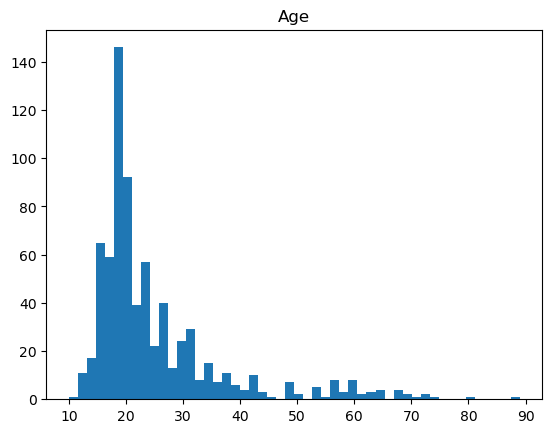

In [4]:
df.hist('Age', bins=50, grid=False)

<AxesSubplot:title={'center':'Streaming service popularity'}>

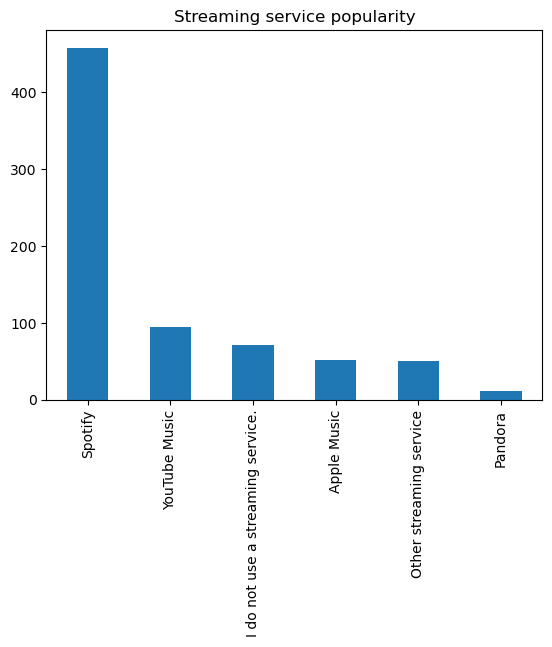

In [5]:
df['Primary_streaming_service'].value_counts().plot(kind='bar', title='Streaming service popularity')

Text(0.5, 1.0, 'Age by streaming service')

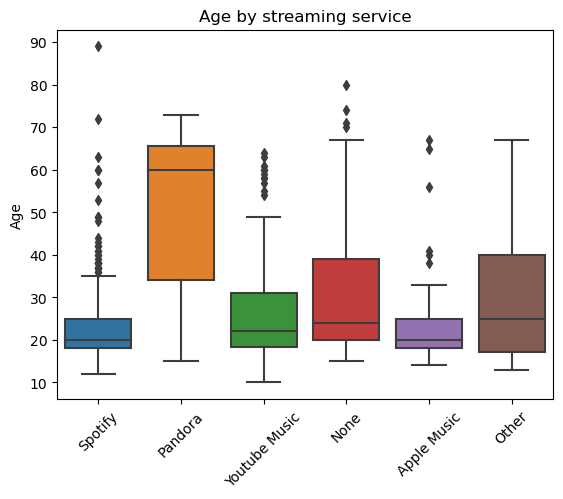

In [6]:
strm = sns.boxplot(data=df, x='Primary_streaming_service', y='Age')
strm.set_xticklabels(labels=['Spotify','Pandora','Youtube Music','None','Apple Music','Other'],rotation=45)
strm.set_xlabel('')
strm.set_title('Age by streaming service')

array([[<AxesSubplot:title={'center':'Hours_per_day'}>]], dtype=object)

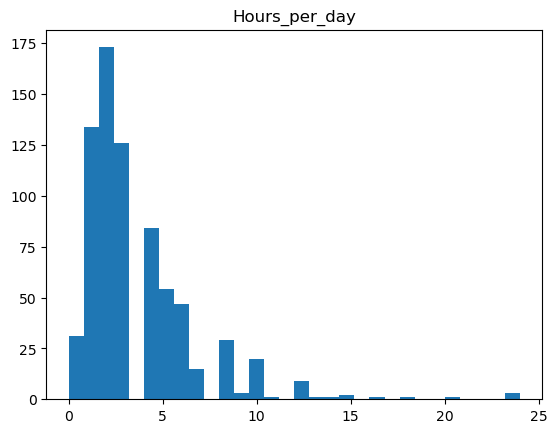

In [7]:
df.hist('Hours_per_day', bins=30, grid=False)

<AxesSubplot:title={'center':'Hours per day vs. Age'}, xlabel='Age', ylabel='Hours_per_day'>

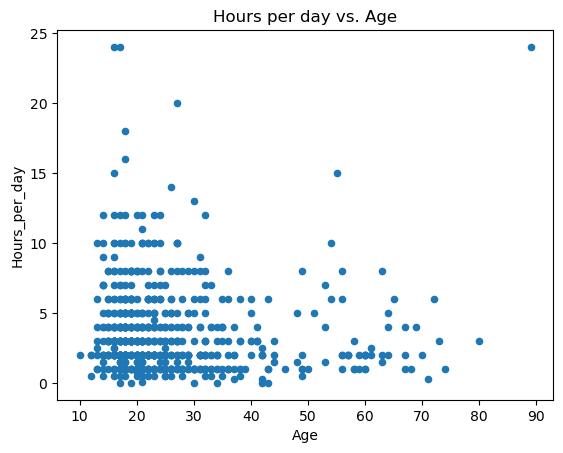

In [8]:
df.plot(x='Age', y='Hours_per_day', kind='scatter', title='Hours per day vs. Age')

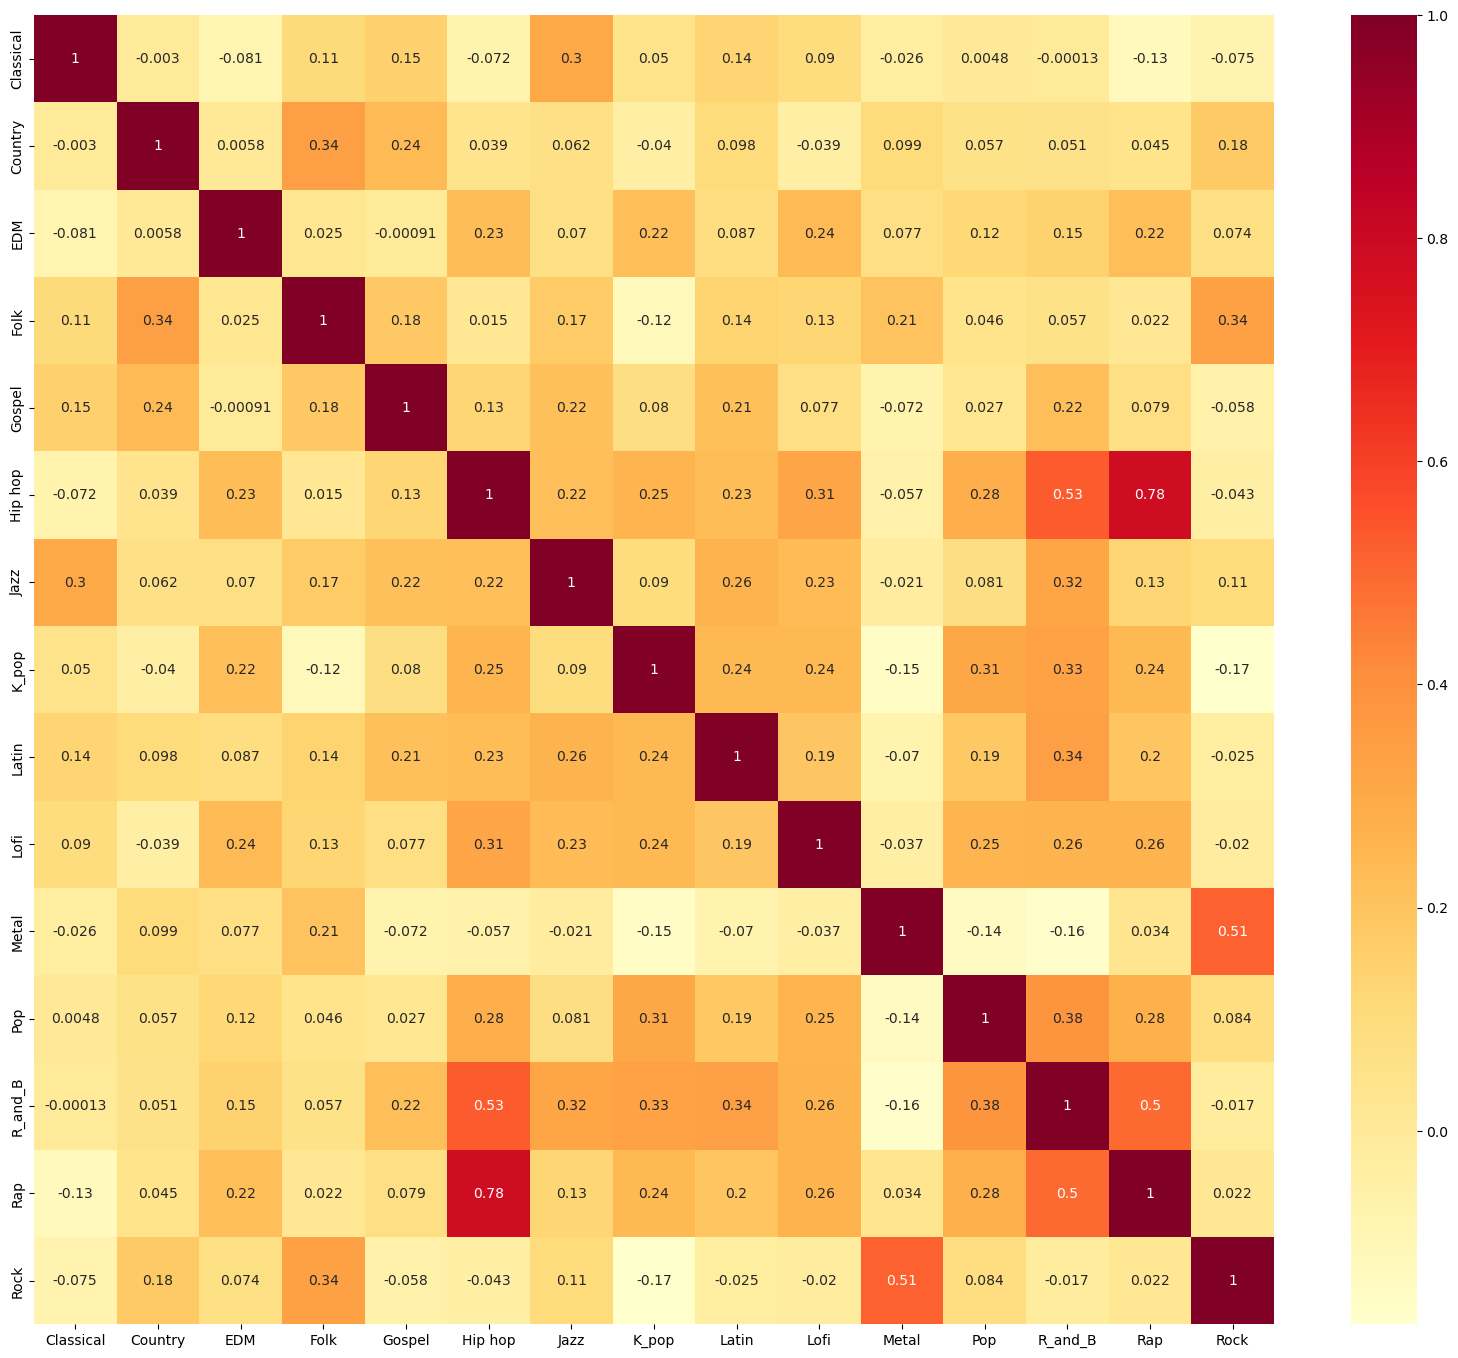

In [10]:
freq_recode = {'Never':0,'Rarely':1,'Sometimes':2,'Very frequently':3}
freq = df.iloc[:,11:26].replace(freq_recode)
corr_f = freq.corr()
#sns.set(rc={'figure.figsize':(20,17)})
rcParams['figure.figsize'] = 20,17
sns.heatmap(corr_f, annot=True, cmap='YlOrRd')
#sns.set(rc={'figure.figsize':(6.4, 4.8)})
rcParams['figure.figsize'] = 6.4,4.8

## Mental health

<AxesSubplot:>

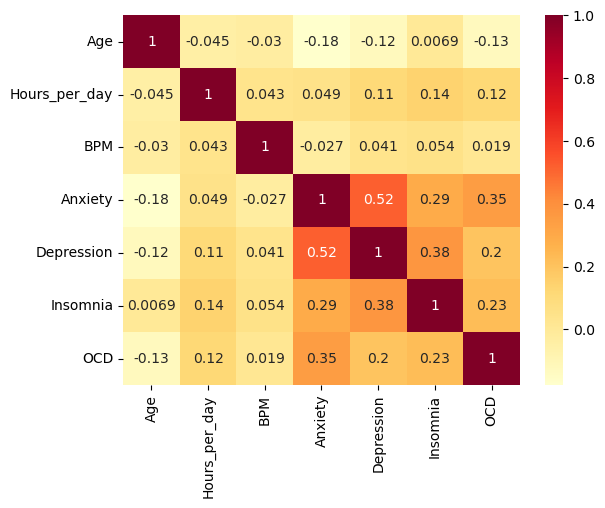

In [11]:
corr_t = df[['Age','Hours_per_day','BPM','Anxiety','Depression','Insomnia','OCD']].corr()
#mask = np.triu(corr_t)
sns.heatmap(corr_t, annot=True, cmap = 'YlOrRd')

Text(0.5, 1.0, 'OCD by age')

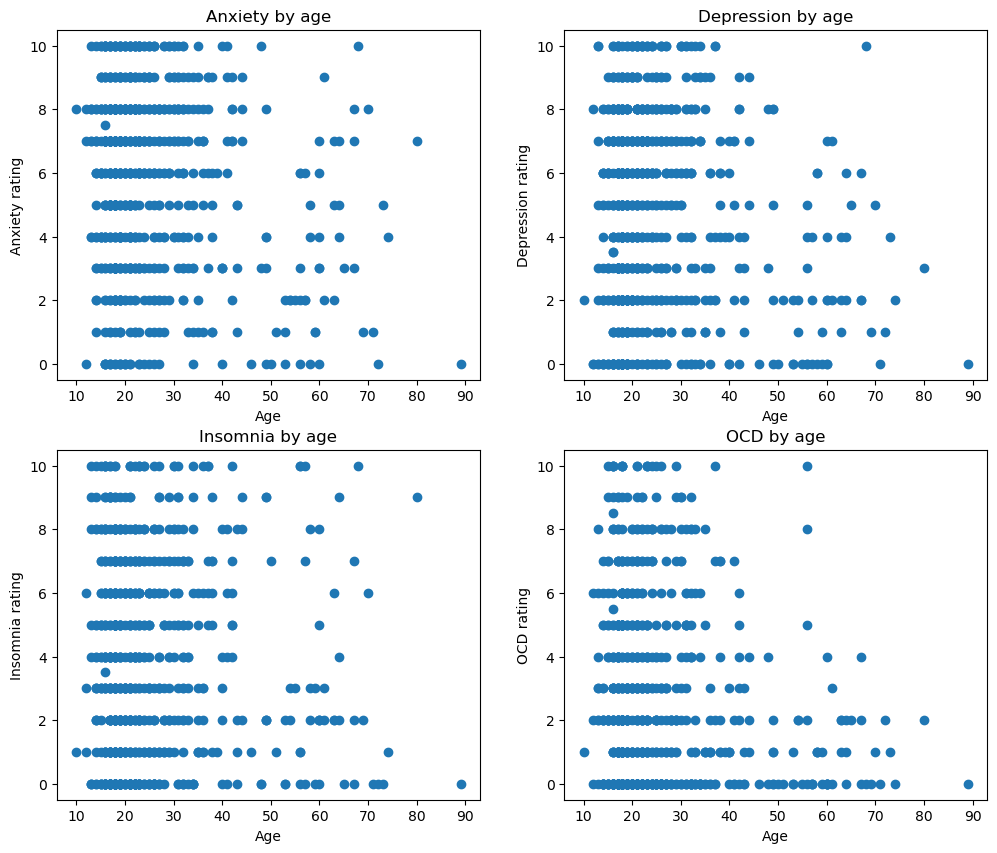

In [29]:
rcParams['figure.figsize'] = 12,10
fig1, axs1 = plt.subplots(2,2)

axs1[0,0].scatter(df['Age'], df['Anxiety'])
axs1[0,0].set_xlabel('Age')
axs1[0,0].set_ylabel('Anxiety rating')
axs1[0,0].set_title('Anxiety by age')

axs1[0,1].scatter(df['Age'], df['Depression'])
axs1[0,1].set_xlabel('Age')
axs1[0,1].set_ylabel('Depression rating')
axs1[0,1].set_title('Depression by age')

axs1[1,0].scatter(df['Age'], df['Insomnia'])
axs1[1,0].set_xlabel('Age')
axs1[1,0].set_ylabel('Insomnia rating')
axs1[1,0].set_title('Insomnia by age')

axs1[1,1].scatter(df['Age'], df['OCD'])
axs1[1,1].set_xlabel('Age')
axs1[1,1].set_ylabel('OCD rating')
axs1[1,1].set_title('OCD by age')

Text(0.5, 1.0, 'OCD by Fav genre')

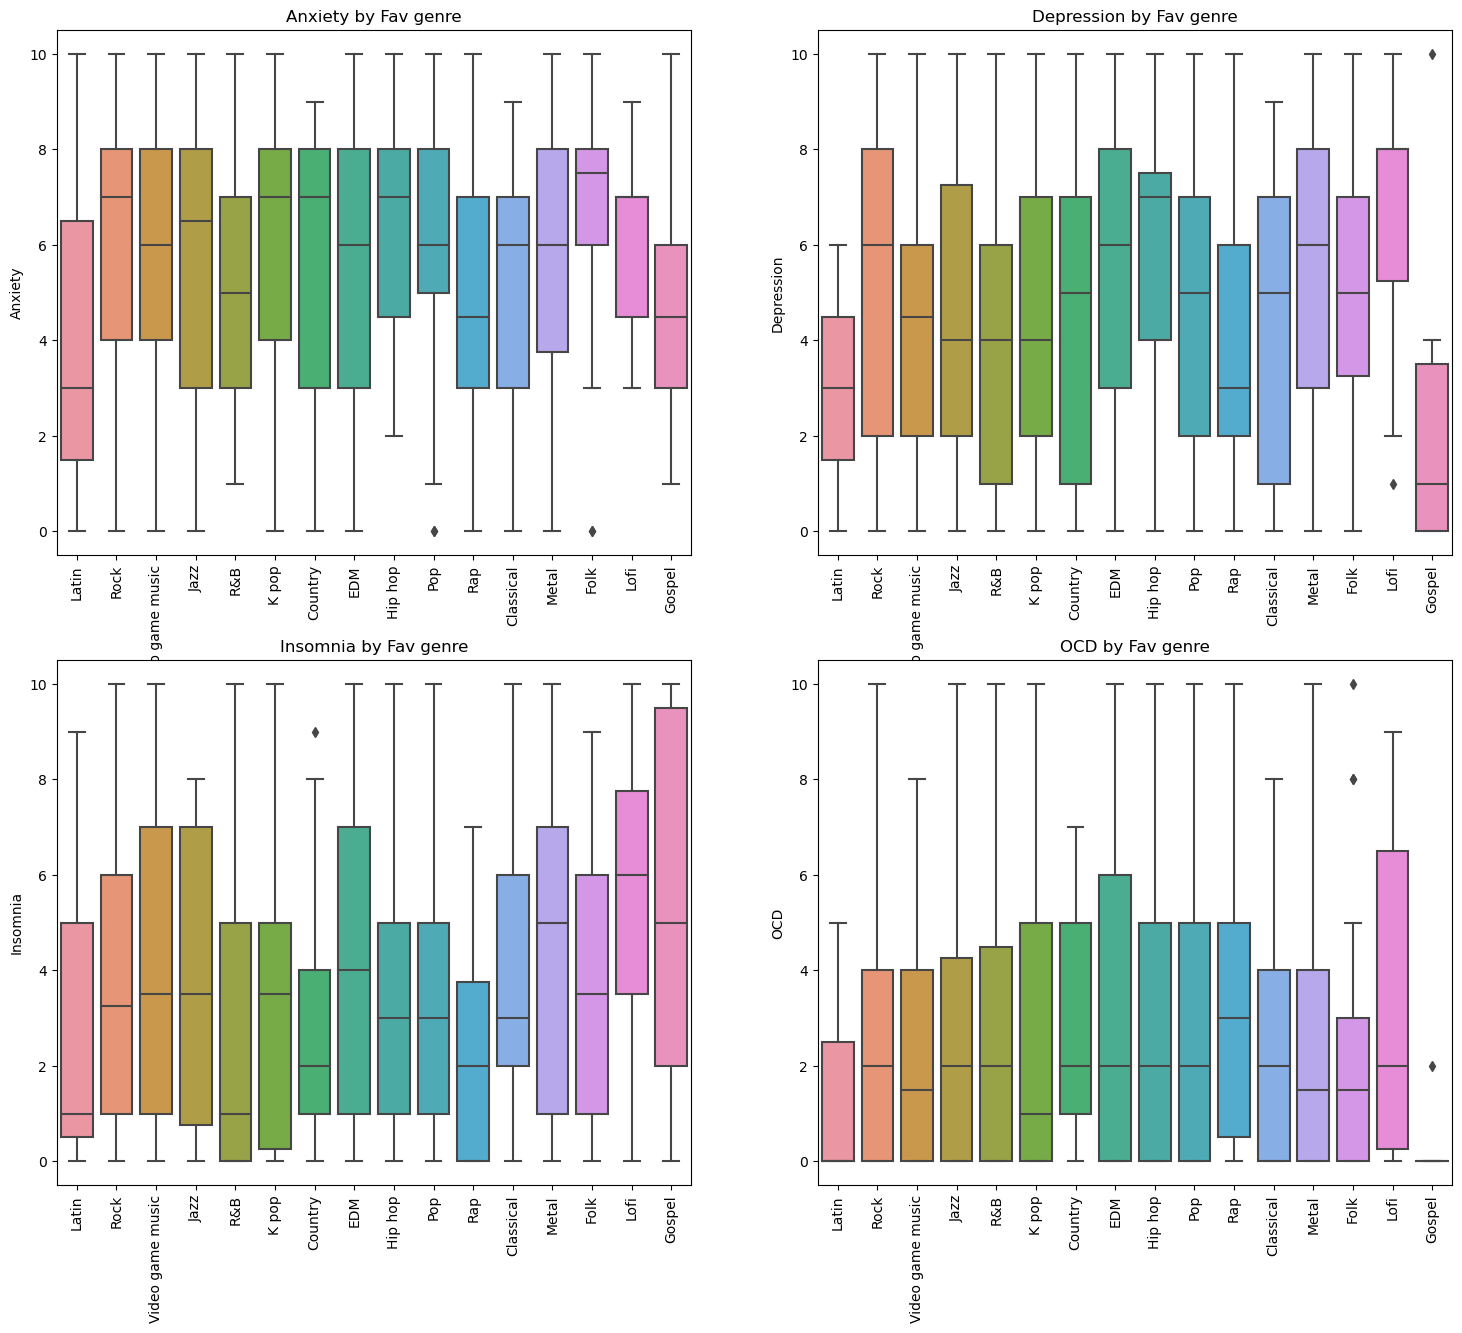

In [45]:
rcParams['figure.figsize'] = 18,15
fig2, axs2 = plt.subplots(2,2)

sns.boxplot(data=df, x='Fav_genre', y='Anxiety', ax=axs2[0,0])
axs2[0,0].tick_params(axis='x', rotation=90)
axs2[0,0].set_xlabel('')
axs2[0,0].set_title('Anxiety by Fav genre')

sns.boxplot(data=df, x='Fav_genre', y='Depression', ax=axs2[0,1])
axs2[0,1].tick_params(axis='x', rotation=90)
axs2[0,1].set_xlabel('')
axs2[0,1].set_title('Depression by Fav genre')

sns.boxplot(data=df, x='Fav_genre', y='Insomnia', ax=axs2[1,0])
axs2[1,0].tick_params(axis='x', rotation=90)
axs2[1,0].set_xlabel('')
axs2[1,0].set_title('Insomnia by Fav genre')

sns.boxplot(data=df, x='Fav_genre', y='OCD', ax=axs2[1,1])
axs2[1,1].tick_params(axis='x', rotation=90)
axs2[1,1].set_xlabel('')
axs2[1,1].set_title('OCD by Fav genre')

Text(0.5, 0, '')

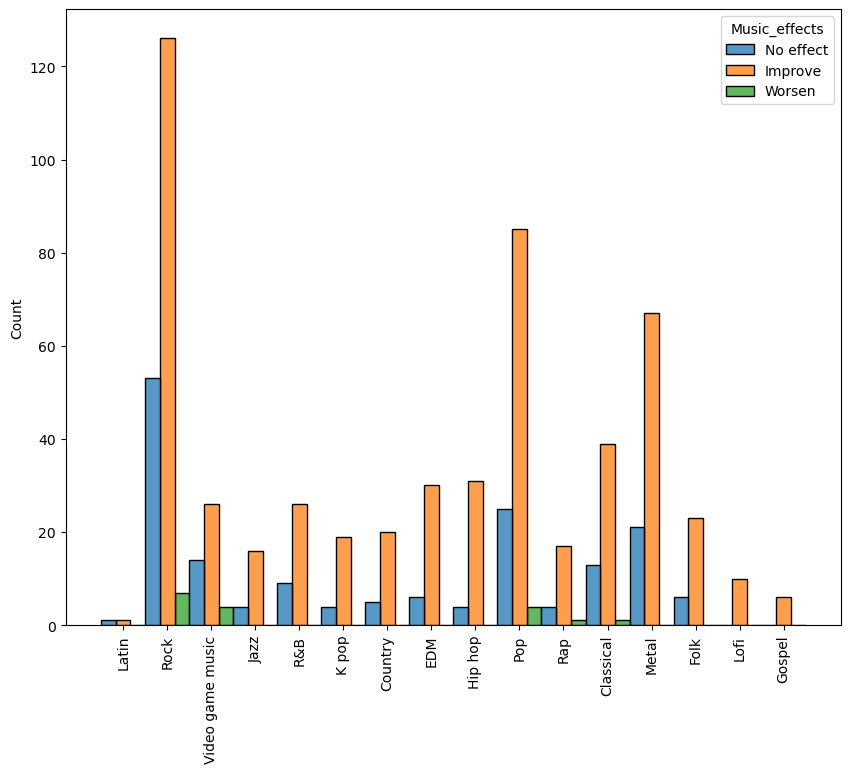

In [54]:
rcParams['figure.figsize'] = 10,8
improve = sns.histplot(data=df, x='Fav_genre', hue='Music_effects', multiple='dodge')
improve.tick_params(axis='x', rotation=90)
improve.set_xlabel('')